# Hyperparameter tuning

## Part 1: Manual Hyperparameter Tuning
### Objective
Manually tune hyperparameters of a neural network and observe the impact on model performance.

### Setup
Start with the necessary imports and dataset preparation. We'll use the MNIST dataset for this exercise, as it's complex enough to demonstrate the effects of hyperparameter tuning.

In [34]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.reshape(-1, 784) / 255.0, X_test.reshape(-1, 784) / 255.0  # flatten and pixel values are scaled to the range [0, 1] by dividing by 255.0.
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10) # one-hot encoding av output
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


## Task: Manual Tuning of Hyperparameters
1. Build a Base Model: Create a simple neural network as a starting point.
2. Manual Tuning: Experiment by manually changing hyperparameters like learning rate, number of layers/neurons, and activation functions.
3. Training and Evaluation: Train the model with different hyperparameter settings and evaluate its performance.

In [36]:
def build_model(num_layers = 2, num_neurons = 32, lr = 0.001, activation_function = 'relu'):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(784,)))                           # input layer
    for _ in range(num_layers):                                                         # hidden layers
        model.add(tf.keras.layers.Dense(num_neurons, activation=activation_function))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))                          # output layer
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [37]:
def train_and_evaluate_model(model, epochs):
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2)
    train_loss, train_accuracy, val_loss, val_accuracy = history.history.values()
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracy, label='train')
    plt.plot(val_accuracy, label='val')
    plt.title(f'Accuracy (test accuracy = {test_accuracy:.4f})')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')

    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='train')
    plt.plot(val_loss, label='val')
    plt.title(f'Loss (test loss = {test_loss:.4f})')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

    plt.legend()
    plt.show()
    return test_loss, test_accuracy

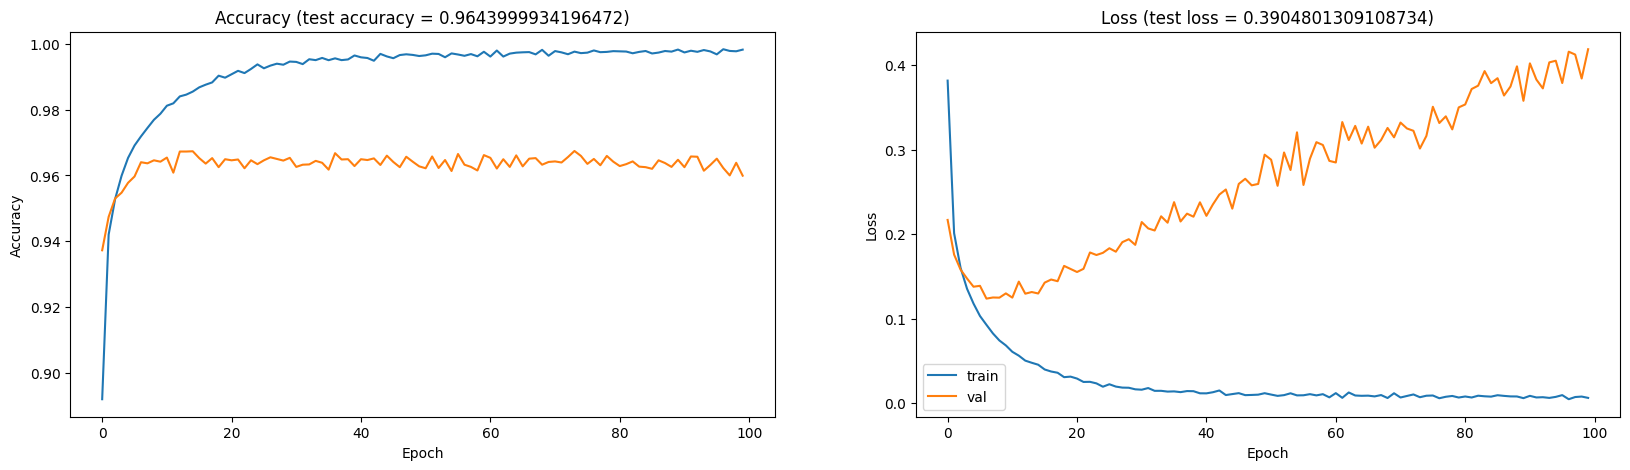

(<keras.src.callbacks.History at 0x7f77f2a95ba0>,
 0.3904801309108734,
 0.9643999934196472)

In [24]:
# test with 1 combination to see if it works
model = build_model()
train_and_evaluate_model(model, epochs=100)

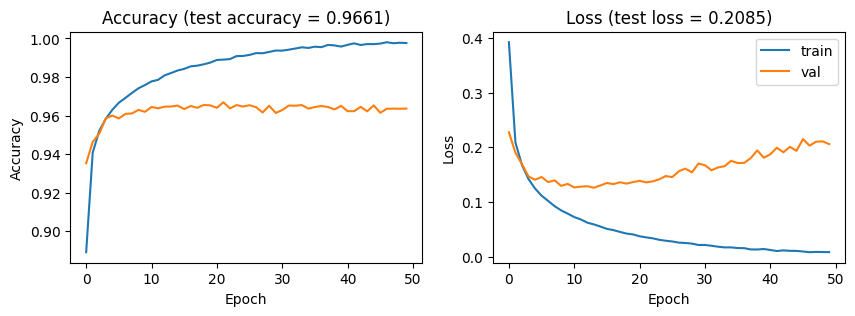

{'Learning rate': 0.001, 'Number of neurons': 32, 'Number of hidden layers': 1, 'Activation function': 'relu', 'Test Loss': 0.208487868309021, 'Test Accuracy': 0.9660999774932861}


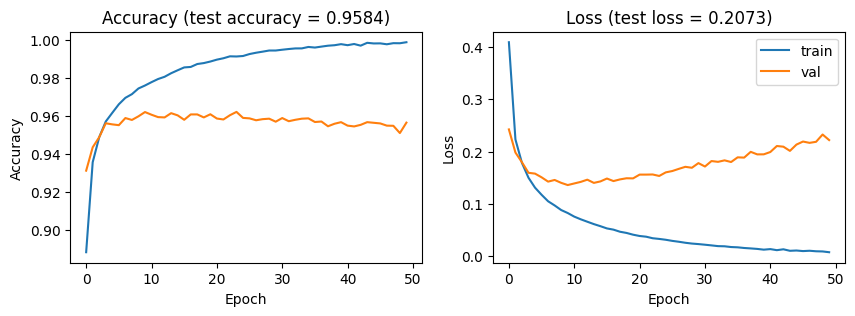

{'Learning rate': 0.001, 'Number of neurons': 32, 'Number of hidden layers': 1, 'Activation function': 'tanh', 'Test Loss': 0.20730912685394287, 'Test Accuracy': 0.9584000110626221}


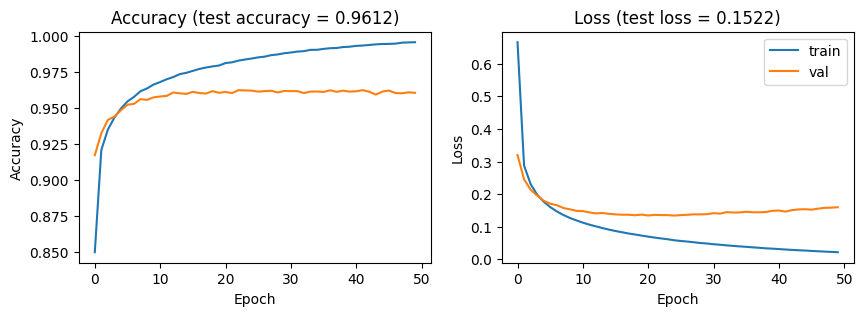

{'Learning rate': 0.001, 'Number of neurons': 32, 'Number of hidden layers': 1, 'Activation function': 'sigmoid', 'Test Loss': 0.15218599140644073, 'Test Accuracy': 0.9611999988555908}


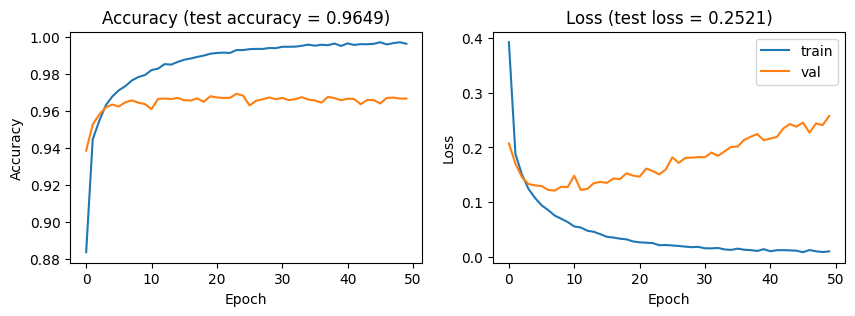

{'Learning rate': 0.001, 'Number of neurons': 32, 'Number of hidden layers': 2, 'Activation function': 'relu', 'Test Loss': 0.25207147002220154, 'Test Accuracy': 0.964900016784668}


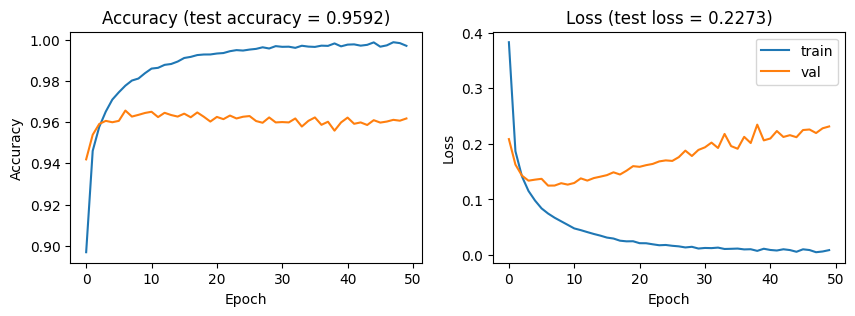

{'Learning rate': 0.001, 'Number of neurons': 32, 'Number of hidden layers': 2, 'Activation function': 'tanh', 'Test Loss': 0.2273356020450592, 'Test Accuracy': 0.9592000246047974}


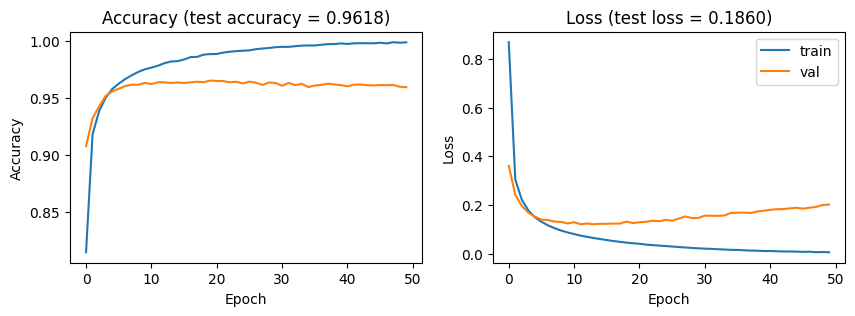

{'Learning rate': 0.001, 'Number of neurons': 32, 'Number of hidden layers': 2, 'Activation function': 'sigmoid', 'Test Loss': 0.18595591187477112, 'Test Accuracy': 0.9617999792098999}


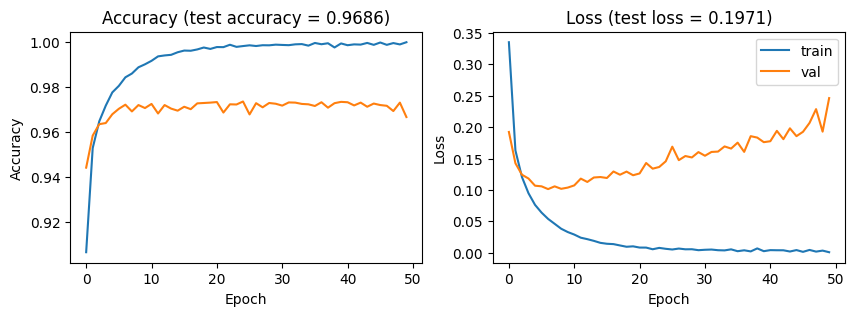

{'Learning rate': 0.001, 'Number of neurons': 64, 'Number of hidden layers': 1, 'Activation function': 'relu', 'Test Loss': 0.19707757234573364, 'Test Accuracy': 0.9685999751091003}


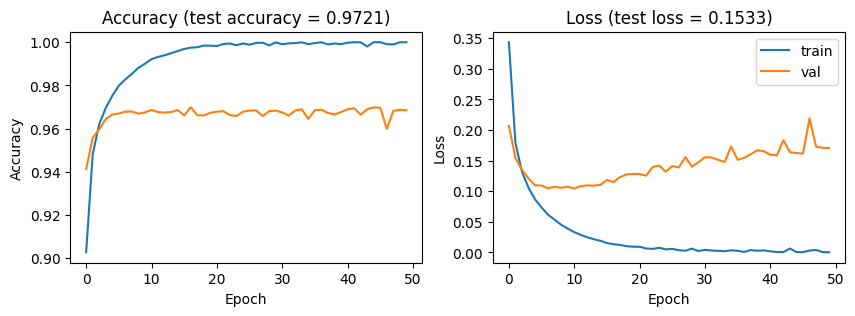

{'Learning rate': 0.001, 'Number of neurons': 64, 'Number of hidden layers': 1, 'Activation function': 'tanh', 'Test Loss': 0.1532600075006485, 'Test Accuracy': 0.972100019454956}


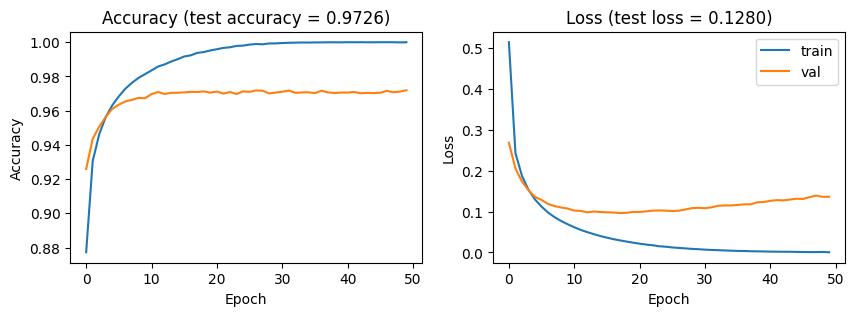

{'Learning rate': 0.001, 'Number of neurons': 64, 'Number of hidden layers': 1, 'Activation function': 'sigmoid', 'Test Loss': 0.127979576587677, 'Test Accuracy': 0.972599983215332}


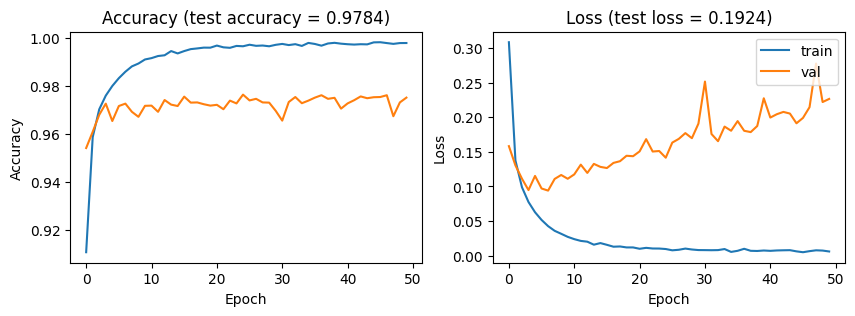

{'Learning rate': 0.001, 'Number of neurons': 64, 'Number of hidden layers': 2, 'Activation function': 'relu', 'Test Loss': 0.192369282245636, 'Test Accuracy': 0.9783999919891357}


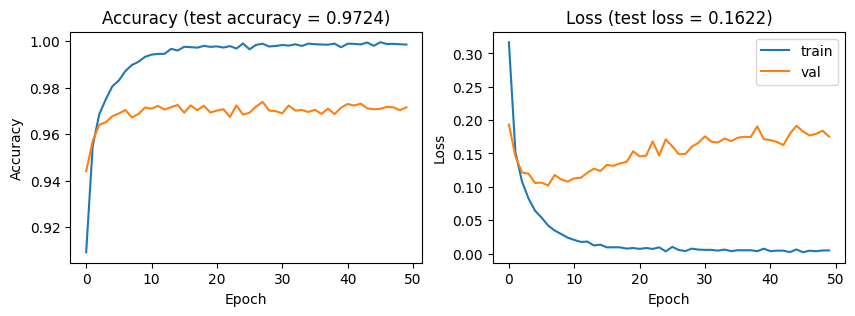

{'Learning rate': 0.001, 'Number of neurons': 64, 'Number of hidden layers': 2, 'Activation function': 'tanh', 'Test Loss': 0.16218481957912445, 'Test Accuracy': 0.9724000096321106}


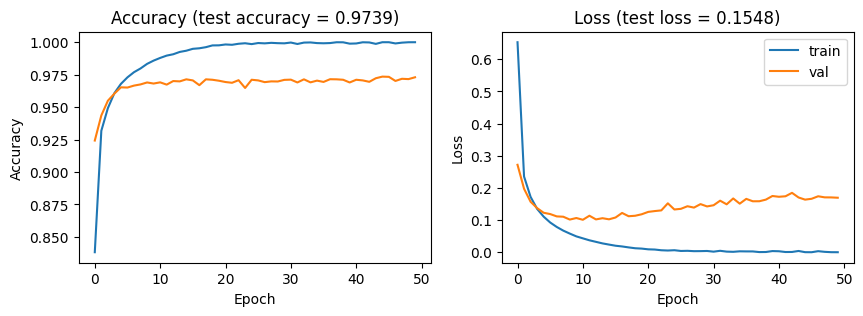

{'Learning rate': 0.001, 'Number of neurons': 64, 'Number of hidden layers': 2, 'Activation function': 'sigmoid', 'Test Loss': 0.1548435539007187, 'Test Accuracy': 0.9739000201225281}


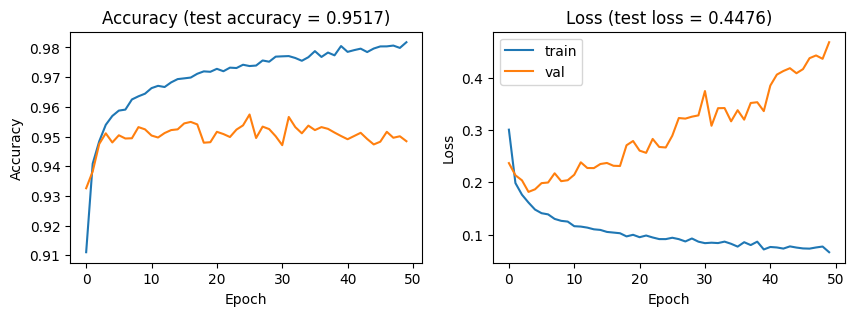

{'Learning rate': 0.01, 'Number of neurons': 32, 'Number of hidden layers': 1, 'Activation function': 'relu', 'Test Loss': 0.4476087987422943, 'Test Accuracy': 0.95169997215271}


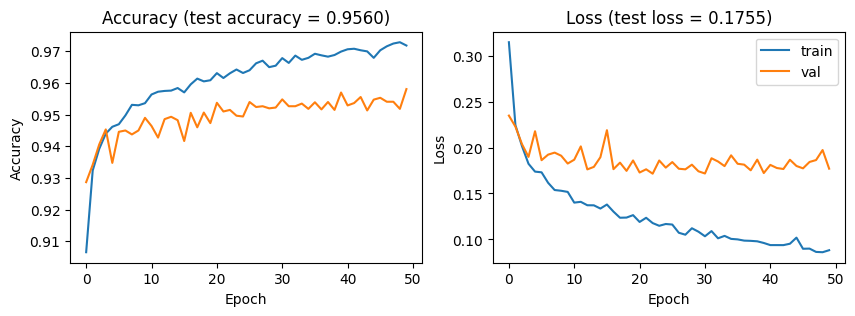

{'Learning rate': 0.01, 'Number of neurons': 32, 'Number of hidden layers': 1, 'Activation function': 'tanh', 'Test Loss': 0.1755256950855255, 'Test Accuracy': 0.9559999704360962}


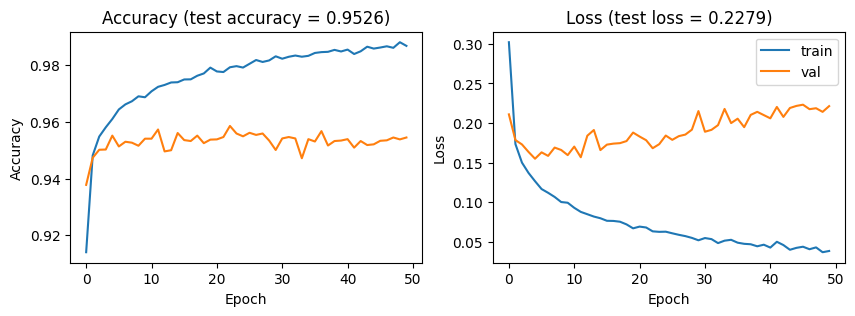

{'Learning rate': 0.01, 'Number of neurons': 32, 'Number of hidden layers': 1, 'Activation function': 'sigmoid', 'Test Loss': 0.22789892554283142, 'Test Accuracy': 0.9526000022888184}


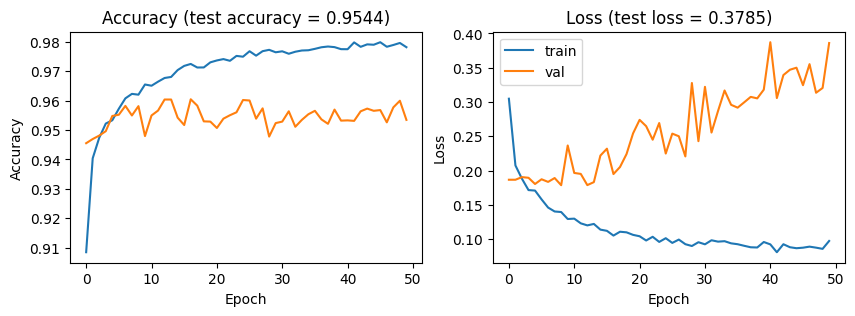

{'Learning rate': 0.01, 'Number of neurons': 32, 'Number of hidden layers': 2, 'Activation function': 'relu', 'Test Loss': 0.37846341729164124, 'Test Accuracy': 0.9544000029563904}


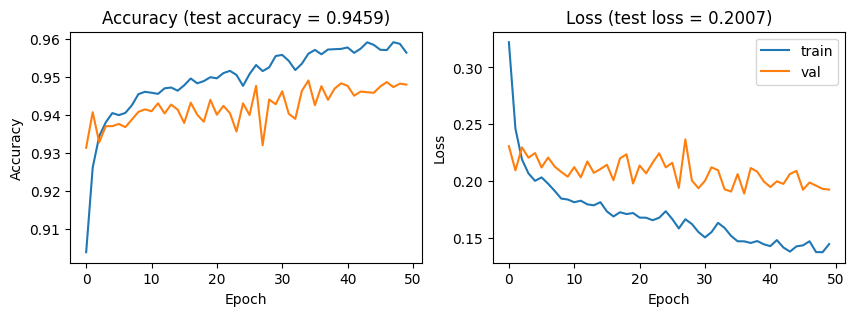

{'Learning rate': 0.01, 'Number of neurons': 32, 'Number of hidden layers': 2, 'Activation function': 'tanh', 'Test Loss': 0.20067302882671356, 'Test Accuracy': 0.945900022983551}


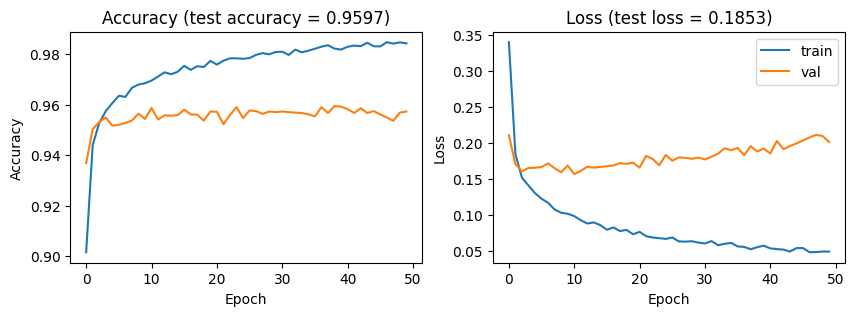

{'Learning rate': 0.01, 'Number of neurons': 32, 'Number of hidden layers': 2, 'Activation function': 'sigmoid', 'Test Loss': 0.1852598339319229, 'Test Accuracy': 0.9596999883651733}


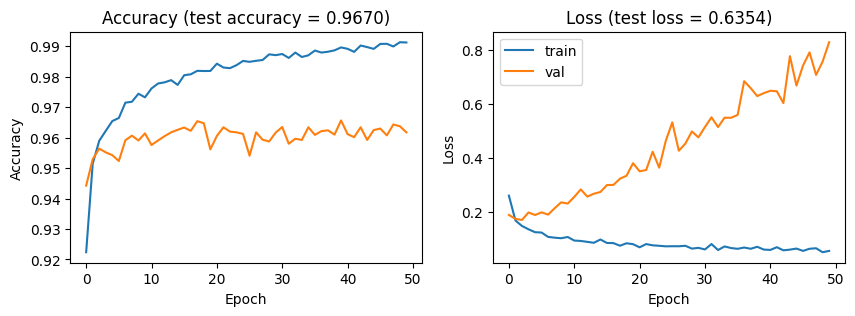

{'Learning rate': 0.01, 'Number of neurons': 64, 'Number of hidden layers': 1, 'Activation function': 'relu', 'Test Loss': 0.6354381442070007, 'Test Accuracy': 0.9670000076293945}


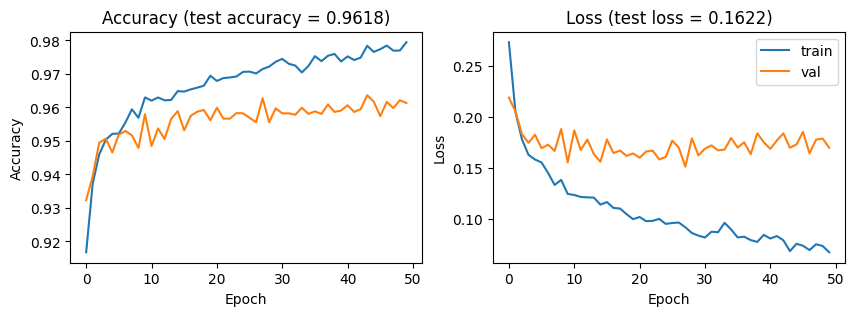

{'Learning rate': 0.01, 'Number of neurons': 64, 'Number of hidden layers': 1, 'Activation function': 'tanh', 'Test Loss': 0.16216720640659332, 'Test Accuracy': 0.9617999792098999}


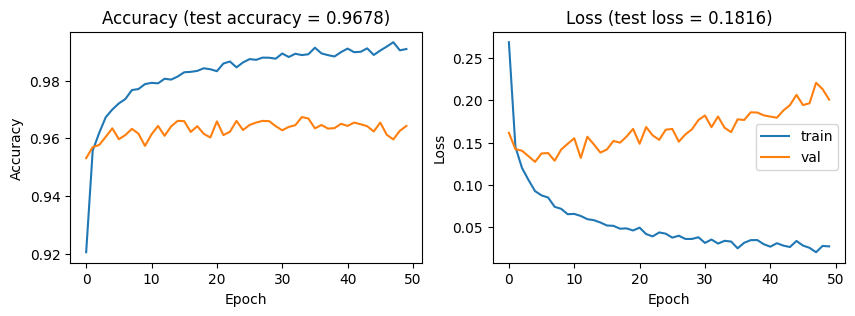

{'Learning rate': 0.01, 'Number of neurons': 64, 'Number of hidden layers': 1, 'Activation function': 'sigmoid', 'Test Loss': 0.18158677220344543, 'Test Accuracy': 0.9678000211715698}


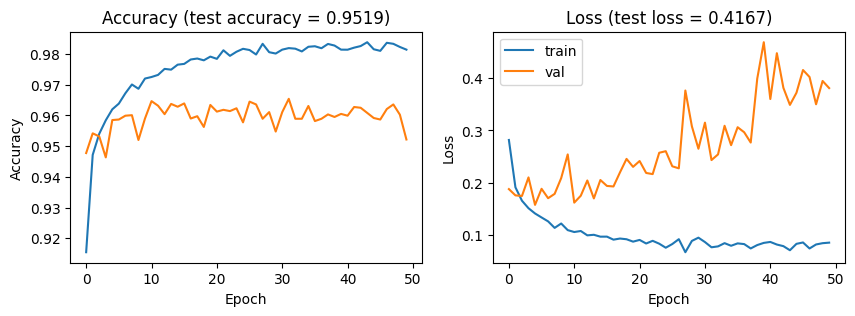

{'Learning rate': 0.01, 'Number of neurons': 64, 'Number of hidden layers': 2, 'Activation function': 'relu', 'Test Loss': 0.41667866706848145, 'Test Accuracy': 0.9519000053405762}


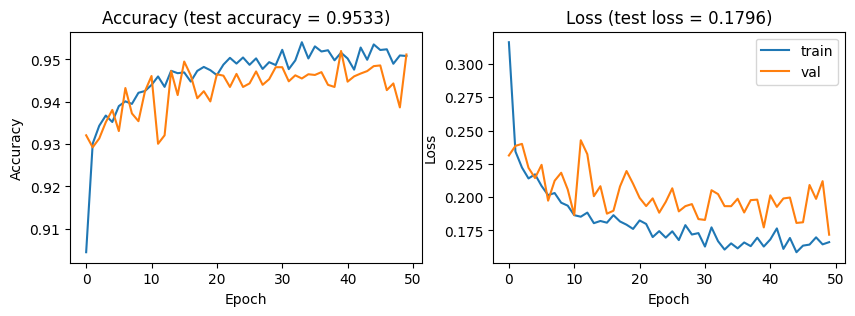

{'Learning rate': 0.01, 'Number of neurons': 64, 'Number of hidden layers': 2, 'Activation function': 'tanh', 'Test Loss': 0.1795838624238968, 'Test Accuracy': 0.9532999992370605}


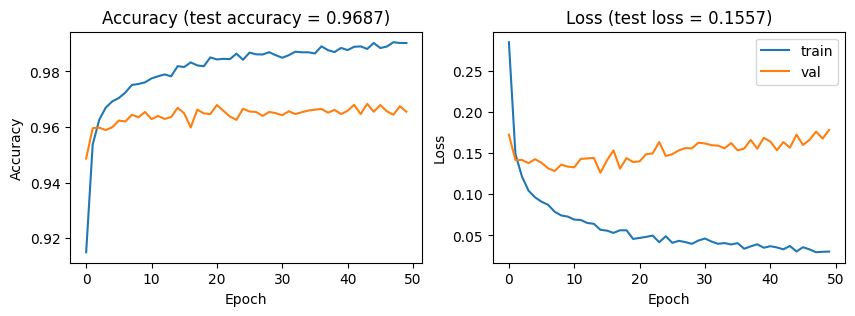

{'Learning rate': 0.01, 'Number of neurons': 64, 'Number of hidden layers': 2, 'Activation function': 'sigmoid', 'Test Loss': 0.1556677669286728, 'Test Accuracy': 0.9686999917030334}


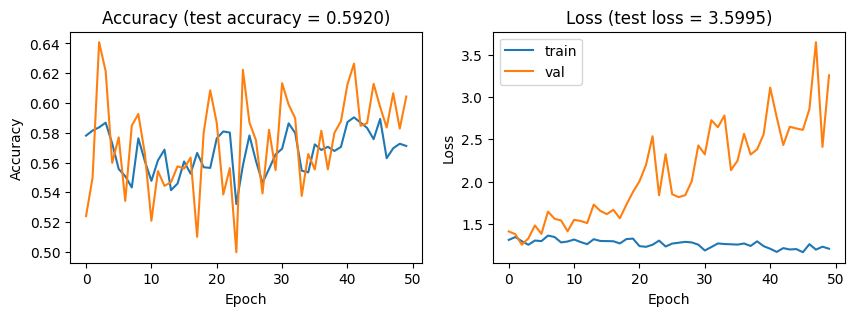

{'Learning rate': 0.1, 'Number of neurons': 32, 'Number of hidden layers': 1, 'Activation function': 'relu', 'Test Loss': 3.5994832515716553, 'Test Accuracy': 0.5920000076293945}


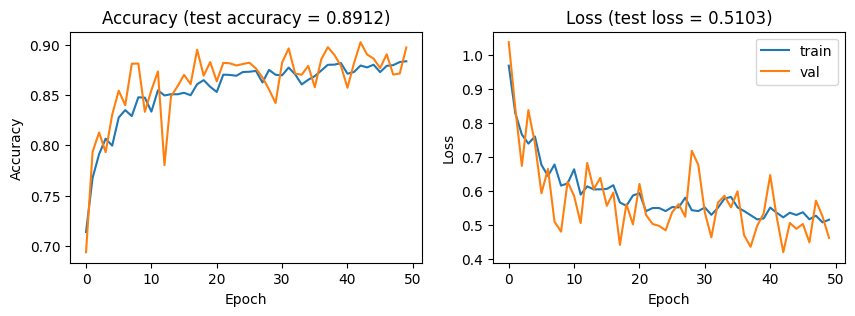

{'Learning rate': 0.1, 'Number of neurons': 32, 'Number of hidden layers': 1, 'Activation function': 'tanh', 'Test Loss': 0.5103296637535095, 'Test Accuracy': 0.8912000060081482}


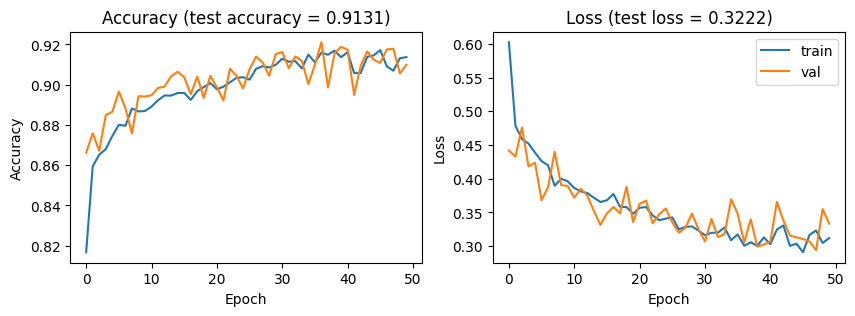

{'Learning rate': 0.1, 'Number of neurons': 32, 'Number of hidden layers': 1, 'Activation function': 'sigmoid', 'Test Loss': 0.32222095131874084, 'Test Accuracy': 0.913100004196167}


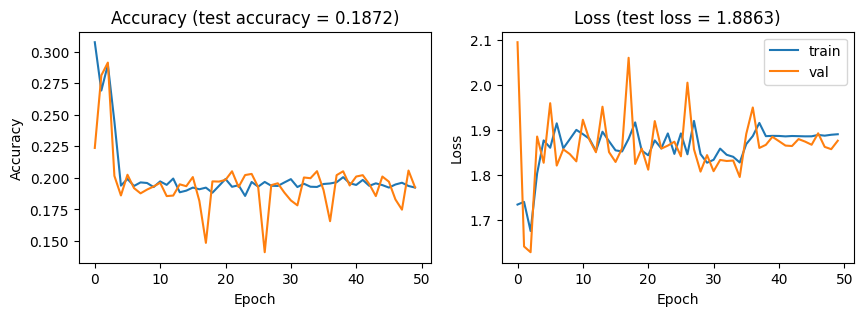

{'Learning rate': 0.1, 'Number of neurons': 32, 'Number of hidden layers': 2, 'Activation function': 'relu', 'Test Loss': 1.88631010055542, 'Test Accuracy': 0.18719999492168427}


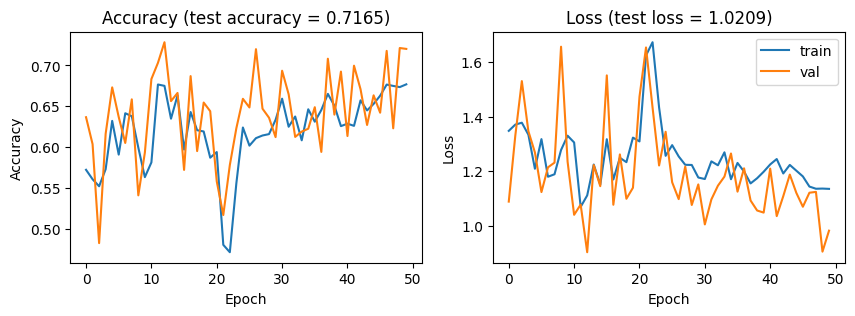

{'Learning rate': 0.1, 'Number of neurons': 32, 'Number of hidden layers': 2, 'Activation function': 'tanh', 'Test Loss': 1.0208719968795776, 'Test Accuracy': 0.7164999842643738}


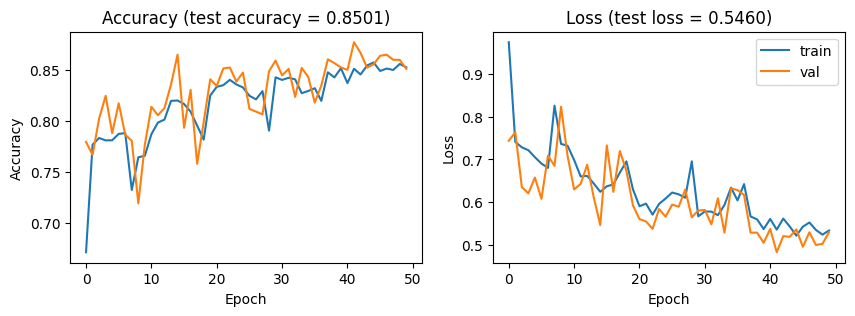

{'Learning rate': 0.1, 'Number of neurons': 32, 'Number of hidden layers': 2, 'Activation function': 'sigmoid', 'Test Loss': 0.5460492968559265, 'Test Accuracy': 0.8500999808311462}


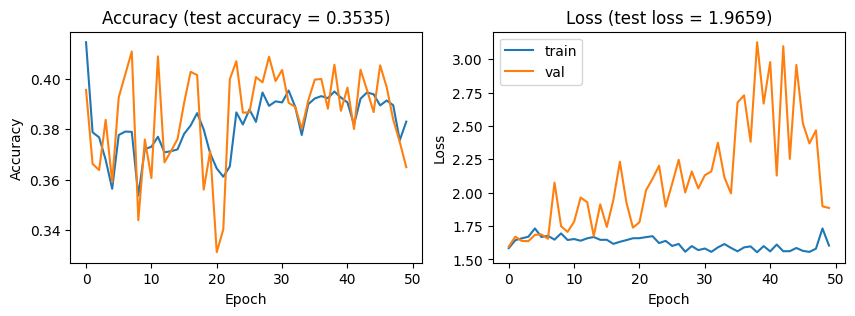

{'Learning rate': 0.1, 'Number of neurons': 64, 'Number of hidden layers': 1, 'Activation function': 'relu', 'Test Loss': 1.9659337997436523, 'Test Accuracy': 0.35350000858306885}


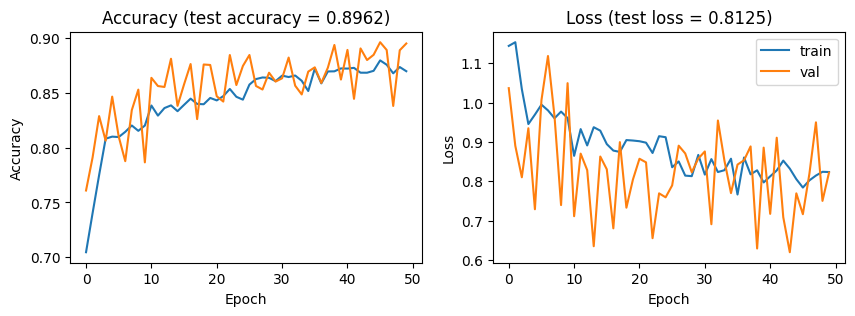

{'Learning rate': 0.1, 'Number of neurons': 64, 'Number of hidden layers': 1, 'Activation function': 'tanh', 'Test Loss': 0.8125079870223999, 'Test Accuracy': 0.8962000012397766}


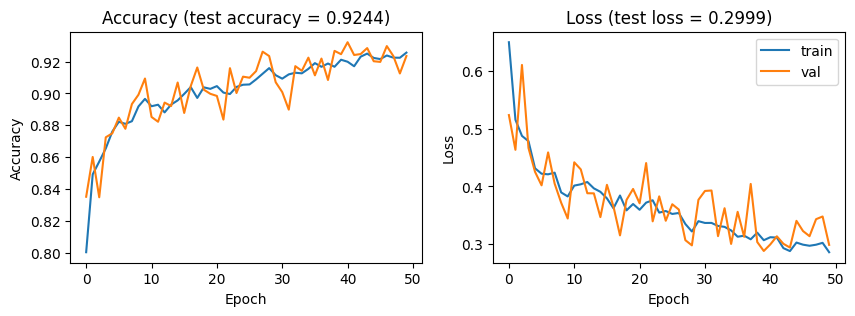

{'Learning rate': 0.1, 'Number of neurons': 64, 'Number of hidden layers': 1, 'Activation function': 'sigmoid', 'Test Loss': 0.2998574376106262, 'Test Accuracy': 0.9243999719619751}


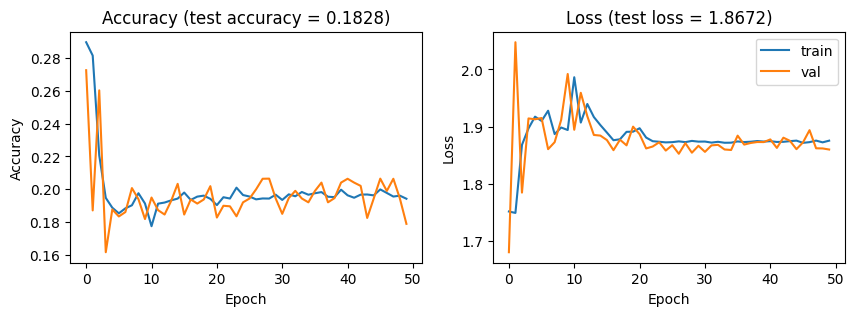

{'Learning rate': 0.1, 'Number of neurons': 64, 'Number of hidden layers': 2, 'Activation function': 'relu', 'Test Loss': 1.8671929836273193, 'Test Accuracy': 0.18279999494552612}


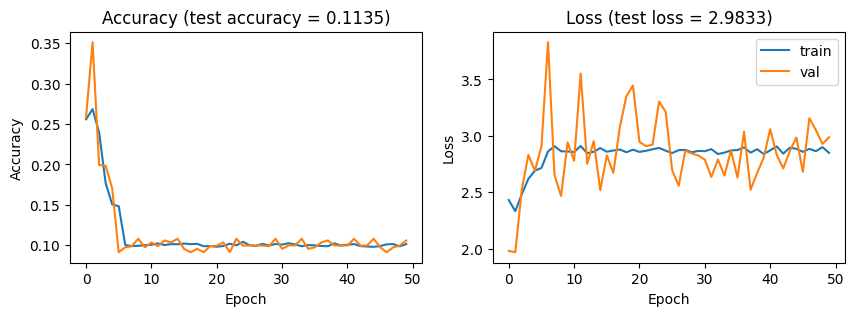

{'Learning rate': 0.1, 'Number of neurons': 64, 'Number of hidden layers': 2, 'Activation function': 'tanh', 'Test Loss': 2.9832570552825928, 'Test Accuracy': 0.11349999904632568}


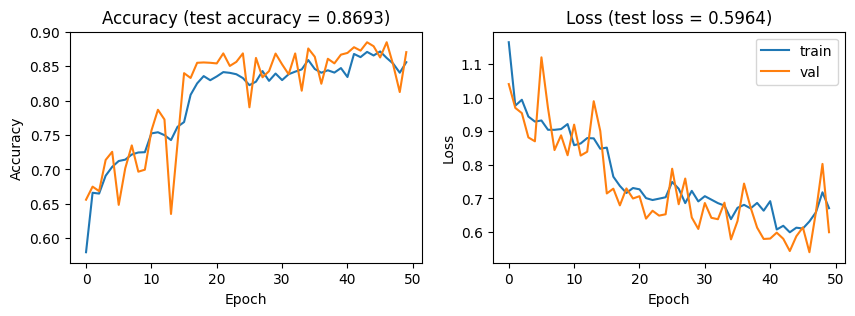

{'Learning rate': 0.1, 'Number of neurons': 64, 'Number of hidden layers': 2, 'Activation function': 'sigmoid', 'Test Loss': 0.5964094996452332, 'Test Accuracy': 0.8693000078201294}

Summary Table:
    Learning rate  Number of neurons  Number of hidden layers  \
0           0.001                 32                        1   
1           0.001                 32                        1   
2           0.001                 32                        1   
3           0.001                 32                        2   
4           0.001                 32                        2   
5           0.001                 32                        2   
6           0.001                 64                        1   
7           0.001                 64                        1   
8           0.001                 64                        1   
9           0.001                 64                        2   
10          0.001                 64                        2   
11          0.001     

In [38]:
results = []

# Example hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
num_neurons = [32, 64]
num_layers = [1, 2]
activation_functions = ['relu', 'tanh', 'sigmoid']
epochs = 50

# Loop through different hyperparameters and train models
for lr in learning_rates:
    for neurons in num_neurons:
        for layers in num_layers:
            for act_function in activation_functions:
                model = build_model(num_layers = layers, num_neurons = neurons, lr = lr, activation_function = act_function)
                test_loss, test_accuracy = train_and_evaluate_model(model, epochs=epochs)
                results.append({
                    'Learning rate': lr,
                    'Number of neurons': neurons,
                    'Number of hidden layers': layers,
                    'Activation function': act_function,
                    'Test Loss': test_loss,
                    'Test Accuracy': test_accuracy,
                })
                print(results[-1])

results_df = pd.DataFrame(results)
print("\nSummary Table:")
print(results_df)

In [39]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(results_df)

,Learning rate,Number of neurons,Number of hidden layers,Activation function,Test Loss,Test Accuracy
0,0.001,32,1,relu,0.208488,0.9661
1,0.001,32,1,tanh,0.207309,0.9584
2,0.001,32,1,sigmoid,0.152186,0.9612
3,0.001,32,2,relu,0.252071,0.9649
4,0.001,32,2,tanh,0.227336,0.9592
5,0.001,32,2,sigmoid,0.185956,0.9618
6,0.001,64,1,relu,0.197078,0.9686
7,0.001,64,1,tanh,0.153260,0.9721
8,0.001,64,1,sigmoid,0.127980,0.9726
9,0.001,64,2,relu,0.192369,0.9784


In [41]:
# output

# Learning rate	Number of neurons	Number of hidden layers	Activation function	Test Loss	Test Accuracy
# 0 	0.001	32	1	relu	0.208488	0.9661
# 1	    0.001	32	1	tanh	0.207309	0.9584
# 2	    0.001	32	1	sigmoid	0.152186	0.9612
# 3	    0.001	32	2	relu	0.252071	0.9649
# 4	    0.001	32	2	tanh	0.227336	0.9592
# 5	    0.001	32	2	sigmoid	0.185956	0.9618
# 6	    0.001	64	1	relu	0.197078	0.9686
# 7	    0.001	64	1	tanh	0.153260	0.9721
# 8	    0.001	64	1	sigmoid	0.127980	0.9726
# 9	    0.001	64	2	relu	0.192369	0.9784
# 10	0.001	64	2	tanh	0.162185	0.9724
# 11	0.001	64	2	sigmoid	0.154844	0.9739
# 12	0.010	32	1	relu	0.447609	0.9517
# 13	0.010	32	1	tanh	0.175526	0.9560
# 14	0.010	32	1	sigmoid	0.227899	0.9526
# 15	0.010	32	2	relu	0.378463	0.9544
# 16	0.010	32	2	tanh	0.200673	0.9459
# 17	0.010	32	2	sigmoid	0.185260	0.9597
# 18	0.010	64	1	relu	0.635438	0.9670
# 19	0.010	64	1	tanh	0.162167	0.9618
# 20	0.010	64	1	sigmoid	0.181587	0.9678
# 21	0.010	64	2	relu	0.416679	0.9519
# 22	0.010	64	2	tanh	0.179584	0.9533
# 23	0.010	64	2	sigmoid	0.155668	0.9687
# 24	0.100	32	1	relu	3.599483	0.5920
# 25	0.100	32	1	tanh	0.510330	0.8912
# 26	0.100	32	1	sigmoid	0.322221	0.9131
# 27	0.100	32	2	relu	1.886310	0.1872
# 28	0.100	32	2	tanh	1.020872	0.7165
# 29	0.100	32	2	sigmoid	0.546049	0.8501
# 30	0.100	64	1	relu	1.965934	0.3535
# 31	0.100	64	1	tanh	0.812508	0.8962
# 32	0.100	64	1	sigmoid	0.299857	0.9244
# 33	0.100	64	2	relu	1.867193	0.1828
# 34	0.100	64	2	tanh	2.983257	0.1135
# 35	0.100	64	2	sigmoid	0.596409	0.8693

## Visualization
Plot the accuracy and loss for different hyperparameter settings.

## Analysis and Questions
* How did different learning rates affect the training process and model accuracy?
    * lr 0.1 was too high, noizy data
* What impact did varying the number of layers and neurons have on the model's performance?
* Were there any combinations of hyperparameters that resulted in particularly good or poor performance???? - hur välja????????????
* Hur påskynda beräkningarna??????????????????????
 